# Property Tax Delinquency

This is a dataset that shows deliquency of city property tax in Pittsburgh. We can use this data to determine
which neighborhoods have the most deliquency, and tie it together with our other metrics to determine the best neighborhood.
We consider neighborhoods with more deliquency to be worse than those with less.

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Analyses: Best/Worst Neighborhoods
We can look at both the total amount of delinquency, as well as how many incidents each neighbhorhood has.

In [6]:
delinquency_pandas = pd.read_csv("tax-delinquency.csv")
delinquency_pandas.head()

# loading in dataset ^

# seperate into each neighborhood:
delinquency_pandas['neighborhood'].value_counts()

neighborhood
Lincoln-Lemington-Belmar    1155
Homewood North              1083
Perry South                  919
Carrick                      884
Marshall-Shadeland           876
                            ... 
Chateau                       15
South Shore                   12
Glen Hazel                     8
Allegheny Center               3
Arlington Heights              3
Name: count, Length: 91, dtype: int64

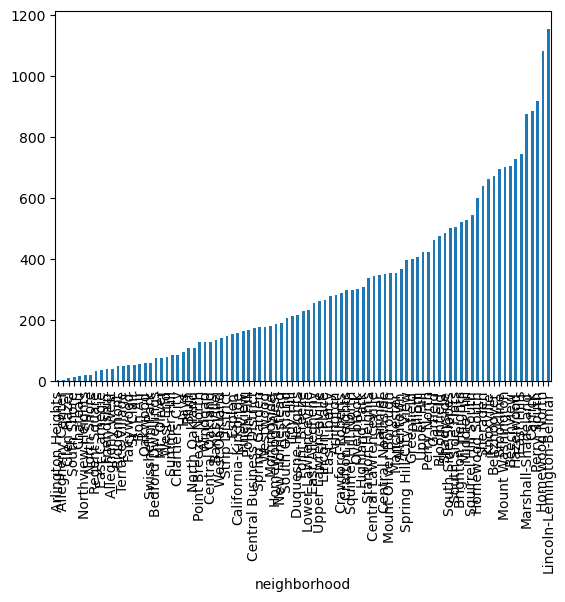

In [15]:
ds = pd.Series(delinquency_pandas['neighborhood'].value_counts())
ds = ds.sort_values(ascending=True)
ds.plot(kind = "bar")
plt.show()

But that's way too crowded, so let's just look at the 10 best and 10 worst neighborhoods in this category.

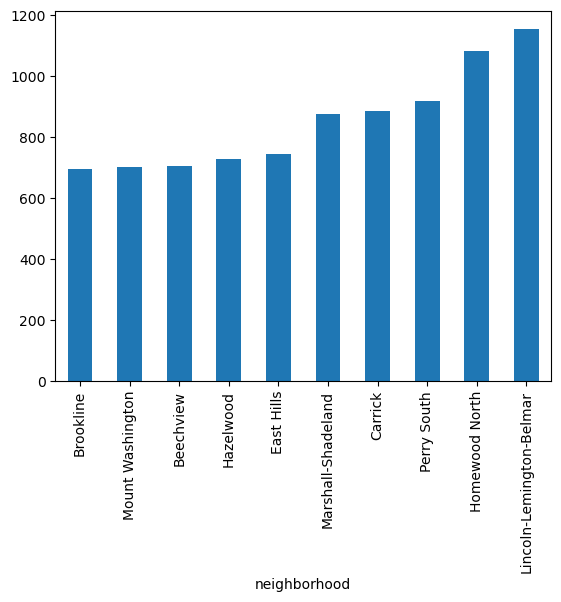

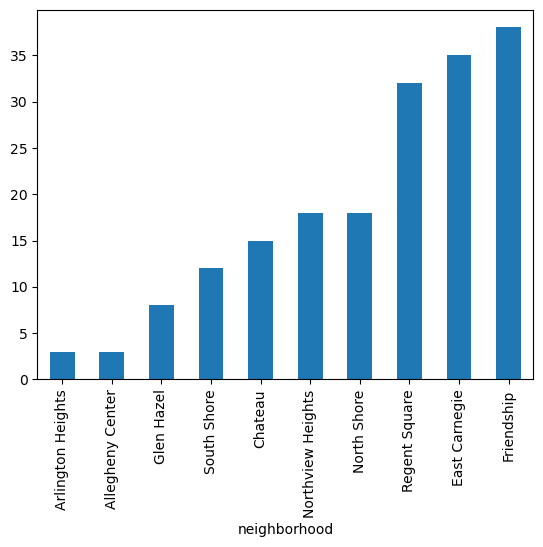

In [19]:
worst_ds = ds.tail(10)
best_ds = ds.head(10)

worst_ds.plot(kind = "bar")
plt.show()
best_ds.plot(kind = "bar")
plt.show()

So, the neighborhoods with the lowest number of properties which are delinquent on their taxes are Arlington Heights and Allegheny Center, and the ones with the highest number of properties delinquent on taxes are Homewood North and Lincoln-Lemington-Belmar. 

Something else that may be important to note is that not every neighborhood has the same amount of properties, so one with a low amount of tax delinquent properties may just be a comparitively small neighborhood.

Now, we can look at how much each individual neighborhood is delinquent on their property taxes. After all, the few properties in the winning neighborhoods may be repeat offenders who have racked up large tax debts, and the losing neighborhoods may have just forgot to pay for the month.

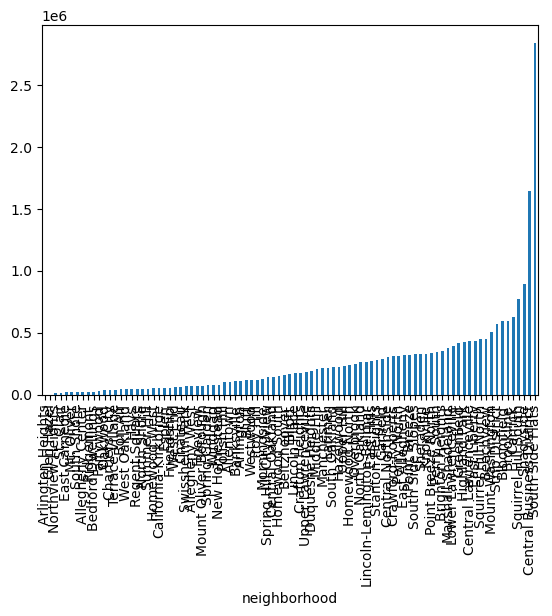

23015501.540000003


In [27]:
amt_delinquent = delinquency_pandas.groupby("neighborhood").sum()["current_delq_tax"]
amt_delq = amt_delinquent.sort_values(ascending = True)
amt_delq.plot(kind = 'bar')
plt.show()
print(amt_delq.sum())

Again we'll have to trim this chart to only look at the best and the worst of them all.

Fun Fact: The entire city of Pittsburgh is in $23,015,501.54 of property tax debt as of this month (Nov. 2025).

In [34]:
best_delq = amt_delq.head(10)
best_delq
worst_delq = amt_delq.tail(10)
best_delq

neighborhood
Arlington Heights      566.08
Glen Hazel            1530.79
Northview Heights    11327.36
St. Clair            13898.65
East Carnegie        17950.09
Mt. Oliver           18501.76
South Shore          20029.02
Allegheny Center     20787.76
Ridgemont            22605.73
Bedford Dwellings    26002.57
Name: current_delq_tax, dtype: float64

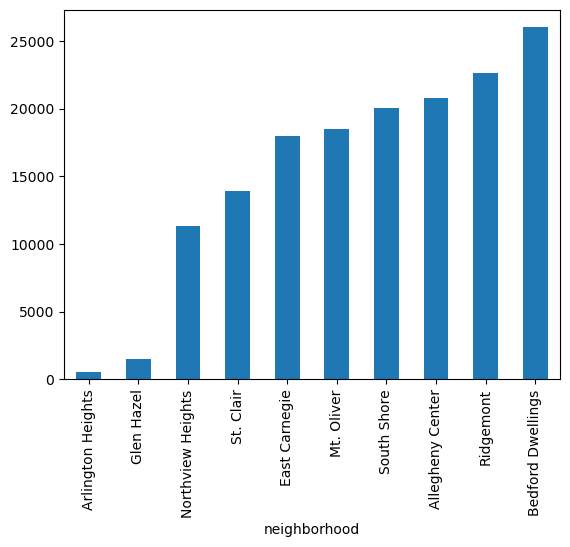

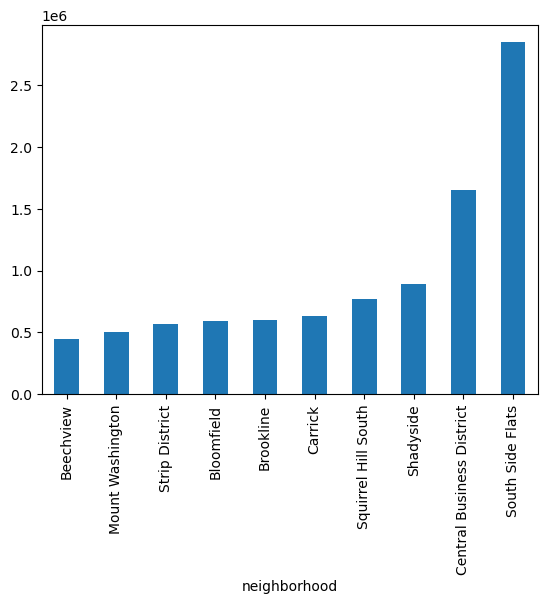

In [ ]:
best_delq.plot(kind = "bar")
plt.show()

worst_delq.plot(kind = "bar")
plt.show()

The neighborhoods with the lowest quantity of tax delinquency are Arlington Heights with 566.08, and Glen Hazel with 1530.79. The neighborhood with the most delinquent tax *by far* is the South Side Flats, with over 2.5m.

### Results of these metrics:
Based on both ways that we analyzed this dataset, it's pretty clear that **Arlington Heights** was the best neighborhood in this regard. Hopefully, this means that this neighborhood is the one that is the best at paying its taxes, and therefore contributes the most to the surrounding community, making it a contender for the best neighborhood of all time!